# Setup
## import calour

In [1]:
import calour as ca

## let's set to print messages of INFO level from Calour
Calour uses Python's builtin [`logging` module](https://docs.python.org/3.5/library/logging.html#levels) to print out logging messages. By default the logging level is set to `WARNING`. Let's change it to `INFO` for the purpose of this tutorial.

In [2]:
ca.set_log_level('INFO')

## and we want interactive plots inside the notebook

In [3]:
%matplotlib notebook

# Time series tutorial 1: Moving picture data set

This data set is from:
Caporaso JG, Lauber CL, Costello EK, Berg-Lyons D, Gonzalez A, Stombaugh J, Knights D, Gajer P, Ravel J, Fierer N, et al. (2011) Moving pictures of the human microbiome. Genome Biology, 12, R50.

The raw data are reproccessed with [deblur method](https://github.com/biocore/deblur), which is published in [mSystem](http://msystems.asm.org/content/2/2/e00191-16)

## Load the data

We use __`read_amplicon`__ to read the data into __`AmpliconExperiment`__ class. This class has some amplicon experiment specific functions such as `filter_taxonomy` etc.

Useful parameters are:
- biom table name
- mapping file name (can be None if no sample metadata available)
- filter_reads - the minimal number of reads per sample in order to keep it
- normalize - the depth to normalize each sample to (note it is not rarefaction butn normalization to constant sum)

In [4]:
exp = ca.read_amplicon(data_file='data/moving_pic.biom', sample_metadata_file='data/moving_pic.sample.txt', filter_reads=1000, normalize=10000)

2017-03-14 15:36:50 INFO loaded 1968 samples, 7056 observations
2017-03-14 15:36:51 INFO 1967 remaining


In [5]:
exp

AmpliconExperiment moving_pic.biom with 1967 samples, 7056 features

## each `Experiment` has the following attributes:
### `data` : a data sparse (or dense) 2D array

This stores the abundance information. Each row is a sample, each column a feature (i.e. OTU, gene, metabolites, etc)

In [6]:
exp.data

<1967x7056 sparse matrix of type '<class 'numpy.float64'>'
	with 130081 stored elements in Compressed Sparse Row format>

### `sample_metadata` : a pandas dataframe with one row per sample
index is the SampleID (first column in the mapping file), matching the biom table sampleIDs

In [7]:
exp.sample_metadata.head(5)

,#SampleID,BarcodeSequence,LinkerPrimerSequence,DAYS_SINCE_EPOCH,TARGET_SUBFRAGMENT,ASSIGNED_FROM_GEO,EXPERIMENT_CENTER,TITLE,COMMON_SAMPLE_SITE,RUN_PREFIX,...,KEY_SEQ,BODY_PRODUCT,AGE_IN_YEARS,RUN_CENTER,LIBRARY_CONSTRUCTION_PROTOCOL,LATITUDE,REGION,HOST_INDIVIDUAL,Description,_calour_original_abundance
#SampleID,,,,,,,,,,,,,,,,,,,,,
L2S137.273277,L2S137.273277,AATCAGTCTCGT,GTGCCAGCMGCCGCGGTAA,14223,V4,n,CCME,Moving_pictures_of_the_human_microbiome,L_palm,s_2_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L2,F4,illumina_time_series,10000.0
L3S167.273782,L3S167.273782,TACTTCGCTCGC,GTGCCAGCMGCCGCGGTAA,14526,V4,n,CCME,Moving_pictures_of_the_human_microbiome,L_palm,s_3_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L3,M3,illumina_time_series,10000.0
L4S102.275028,L4S102.275028,GCAATAGCTGCT,GTGCCAGCMGCCGCGGTAA,14310,V4,n,CCME,Moving_pictures_of_the_human_microbiome,R_palm,s_4_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L4,M3,illumina_time_series,10000.0
L6S243.274842,L6S243.274842,ACGAGTGCTATC,GTGCCAGCMGCCGCGGTAA,14507,V4,n,CCME,Moving_pictures_of_the_human_microbiome,Tongue,s_6_sequence,...,none,UBERON:tongue,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L6,M3,illumina_time_series,10000.0
L3S240.274358,L3S240.274358,AGTACGCTCGAG,GTGCCAGCMGCCGCGGTAA,14178,V4,n,CCME,Moving_pictures_of_the_human_microbiome,R_palm,s_3_sequence,...,none,UBERON:zone of skin of hand,None,CGS-GL,"Five primers, two for PCR and three for sequen...",40.014986,L3,F4,illumina_time_series,10000.0


### `feature_metadata` : a pandas dataframe with one row per feature (i.e. sOTU)
For deblurred data set, index is the actual sequence, matching the biom table

Additional properties are loaded from biom table observation metadata (i.e. taxonomy)

In [8]:
exp.feature_metadata.head(5)

,id,taxonomy
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCTTAGGCGGCAAATTAAGTTAGTGGTTAAATAGTTCGGCTCAACCGGATTTCGCCATTAAAACTGATATGCTAGAGATTAAACGAGGTAGGCGGAATAAGTTA,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidal...
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGTGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCG,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria;Verrucomicrobia;Verrucomicrobiae;Verr...
TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCTCGTAGGCGGTTTGTTGCGTCGGGAGTGAAAACTCAGGGCTTAACCCTGAGCCTGCTTCCGATACGGGCAGACTAGAGGTATGCAGGGGAGAACGGAATTCCTG,TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCT...,Bacteria;Actinobacteria;Actinobacteria;Actinom...
TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGCAGGGCTAGAGTGCAGGAGGGGCAAGTGGAATTCCTA,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,Bacteria;Firmicutes;Clostridia;Clostridiales;L...
TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGCTGATTAAGTCAGCGGTGAAAGGTAGCAGCTTAACTGTTTTACATGCCGTTGATACTGGTTAGCTTGAGTTGACAGAAGGCAGATAGAATTCCT,TACGTAGGTGGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria;Bacteroidetes;Cytophagia;Cytophagales...


## Analysis

### divide to per sample-type experiments
what sample types do we have?

In [9]:
exp.sample_metadata['BODY_PRODUCT'].value_counts()

UBERON:zone of skin of hand    992
UBERON:tongue                  508
UBERON:feces                   467
Name: BODY_PRODUCT, dtype: int64

let's split the dataset:

In [10]:
feces = exp.filter_samples('BODY_PRODUCT', 'UBERON:feces')
tongue = exp.filter_samples('BODY_PRODUCT', 'UBERON:tongue')
# just to have fun, let's negate and use multiple values
hand = exp.filter_samples('BODY_PRODUCT', ['UBERON:feces', 'UBERON:tongue'], negate=True )

__NOTE: The data array and sample and feature metadata are always synchronized to the same order__ for all the manipulations (filtering, sorting, transforming, etc.) done on `Experiment` object.

In [11]:
feces

AmpliconExperiment moving_pic.biom with 467 samples, 7056 features

In [12]:
tongue

AmpliconExperiment moving_pic.biom with 508 samples, 7056 features

In [13]:
hand

AmpliconExperiment moving_pic.biom with 992 samples, 7056 features

Note that filtering samples does not change or get rid of features not present in the set of samples.

### cluster the features so that features behaving similarly are sorted close to each other

In [14]:
# we'll get rid of features will less than 10 total reads over all samples together (they are not interesting and slows clustering)
feces = feces.cluster_features(min_abundance=10)

2017-03-14 15:36:52 INFO 1145 remaining


In [15]:
feces

AmpliconExperiment moving_pic.biom with 467 samples, 1145 features

### since it's a time series - let's sort by the time field
order from previous sorting is perseved if a tie (stable sort)

In [16]:
feces = feces.sort_samples('DAYS_SINCE_EXPERIMENT_START')

can also be done inplace as:

In [17]:
feces.sort_samples('HOST_SUBJECT_ID', inplace=True)

AmpliconExperiment moving_pic.biom with 467 samples, 1145 features

### and now let's plot it.
We use the plot_sort shortcut which does a sort on a (set) of fields and then plots.
We can specify the type of interactive heatmap using the `gui` with following options:
- 'jupyter' plots an interactive plot inside the notebook
- 'qt5' opens the plot in an interactive qt5 window
- None just creates the static matplotlib figure

<IPython.core.display.Javascript object>


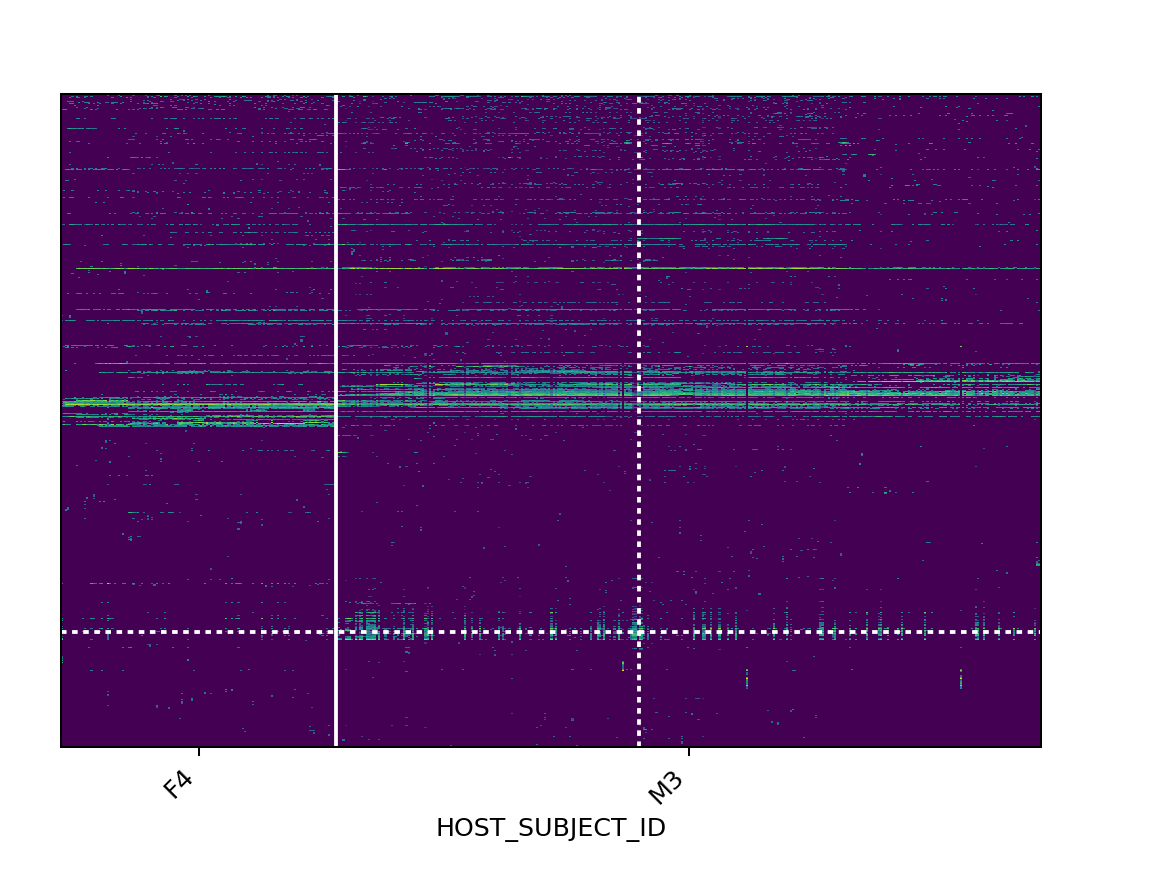

In [18]:
feces.plot(sample_field='HOST_SUBJECT_ID', feature_field=None, gui='jupyter')

__We can see there is a set of sOTUs showing up in together in the individual of "M3" sporadically__ (near the bottom of the heatmap above). This behavior is difficult to see in a naive heatmap without clustering and sorting the features.

### Let's look at bacteria that are more abundance (mean abundance at least 0.1%)

In [19]:
tt=feces.filter_mean(0.001)

2017-03-14 15:36:53 INFO 114 remaining


and let's do Qt gui to test the enrichment of the strange sporadic bacteria

In [20]:
#tt.plot(sample_field='HOST_SUBJECT_ID', gui='qt5')

### Some more analyses
We can sort the features based on abundance in a specific field/value group. For example, let's sort the features by their abundances in the individual "M3" and then look how abundant those bacteria are in the individual "F4":

In [21]:
tt = feces.sort_abundance({'HOST_SUBJECT_ID': ['M3']})

<IPython.core.display.Javascript object>


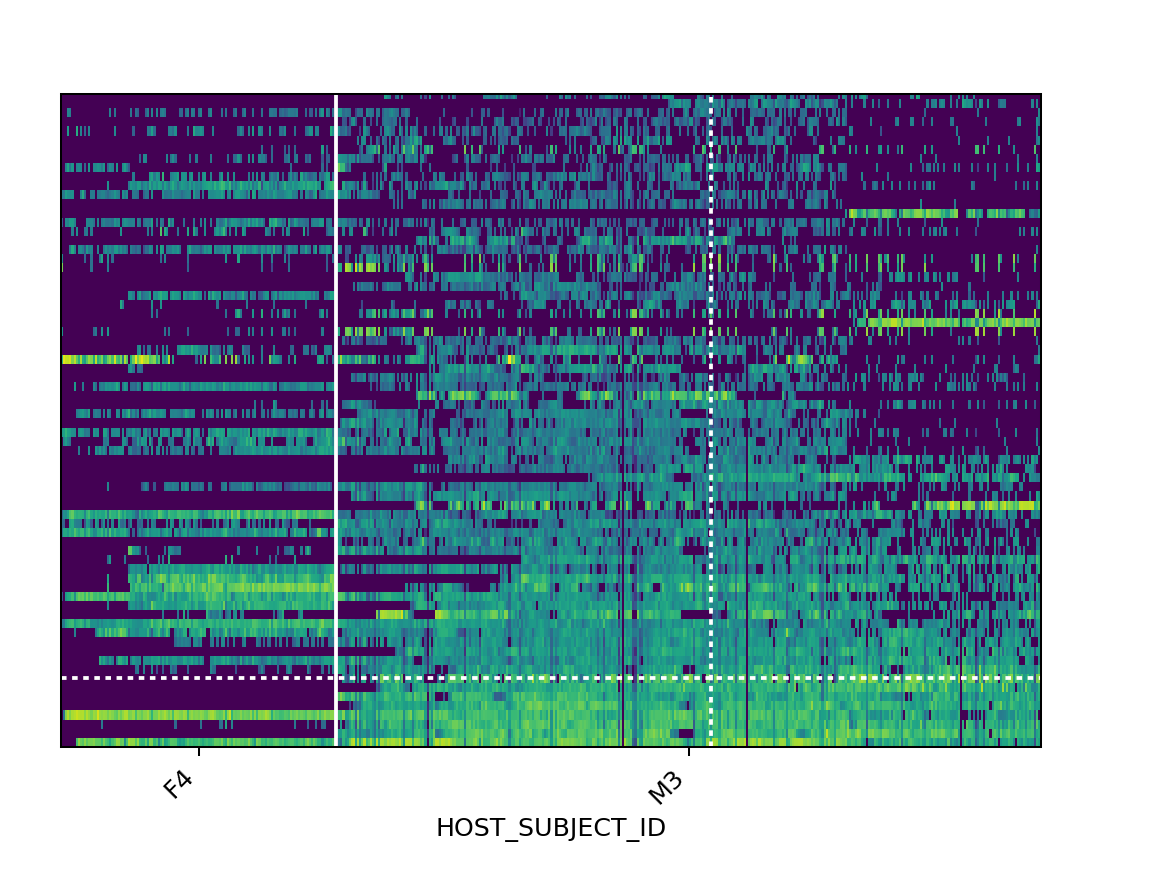

In [22]:
tt.plot(sample_field='HOST_SUBJECT_ID', feature_field=None, gui='jupyter')

### find features correlated with time in the individule of "M3"

In [23]:
tt = feces.filter_samples('HOST_SUBJECT_ID','M3')

In [24]:
dd = tt.correlation('DAYS_SINCE_EXPERIMENT_START')

2017-03-14 15:36:55 INFO method spearman for field DAYS_SINCE_EXPERIMENT_START. Positive correlated features : 65. Negative correlated features : 191. total 256


We get 259 features with significant correlation following FDR control.

Note features are sorted by the effect size (biggest/smallest correlation is top/bottom)

<IPython.core.display.Javascript object>


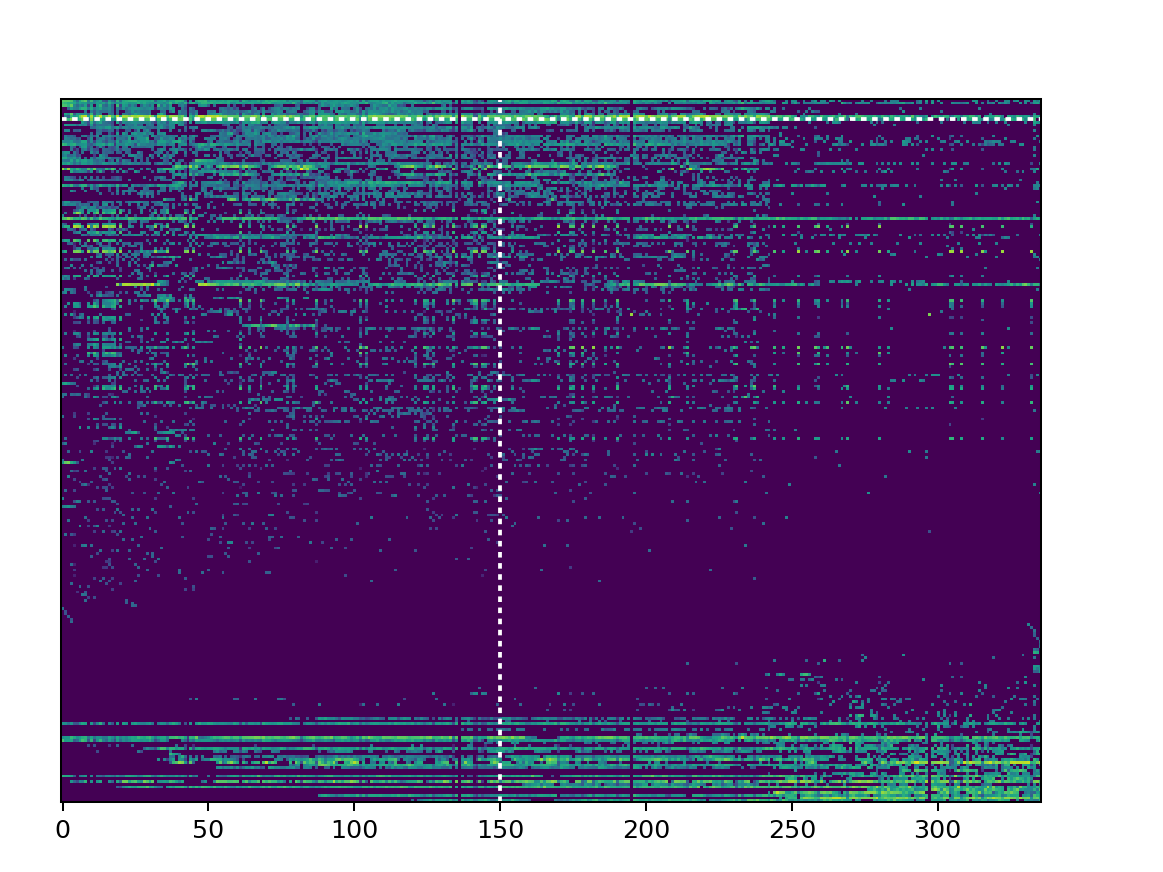

In [25]:
dd.plot(feature_field=None, gui='jupyter')

## Conclusions

* We can identify the taxa that colonize and persist, the ones that disappear forever in the middle of the period, and the ones that stochastically come and go, which is also reported in the original paper.
* In addition, with convenient exploration of the data in heatmap, we find a set of sOTUs appear together in a group. This set is enriched with skin bacteria. We can hypothesize that this set is likely from skin and is a result of sample collecting protocol.

# Time Series tutorial 2: Eric Alm dataset

This data set is from:
David LA, Materna AC, Friedman J, Campos-Baptista MI, Blackburn MC, Perrotta A, Erdman SE and Alm EJ (2014) Host lifestyle affects human microbiota on daily timescales. Genome Biology, 15, R89.

The raw data are reproccessed with [deblur method](https://github.com/biocore/deblur), which is published in [mSystem](http://msystems.asm.org/content/2/2/e00191-16)

## Load data

In [26]:
# we can also read into the generic `Experiment` object
alm = ca.read('data/alm.biom','data/alm.samples.txt', normalize=10000)

2017-03-14 15:36:55 INFO loaded 811 samples, 7289 observations


Get rid of the 'unknown' days and convert to number

In [27]:
alm.sample_metadata['collection_day'] = alm.sample_metadata.collection_day.replace('unknown', -1).astype(float)

## `DonorA` was abroad days 71-122, let's add that info to sample metadata

In [28]:
alm.sample_metadata['travel'] = None
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA'),
                        'travel'] = 'no'
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA') & 
                        (71 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=122),
                        'travel'] = 'yes'

## Both donors had diarrhea at some time points - let's also add that info to sample metadata
be careful with what you eat `:)`

In [29]:
# donor A had diarrhea during his/her travel
alm.sample_metadata['diarrhea_donor_A'] = None
# no diarrhea except for 2 periods ...
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA'),
                        'diarrhea_donor_A'] = 'n'
# 1st period of diarrhea
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA') & 
                        (80 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=85),
                        'diarrhea_donor_A'] = 'y'
# 2nd period of diarrhea
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorA') & 
                        (104 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=113),
                        'diarrhea_donor_A'] = 'y'


__Donor B had diarrehea but from Salmonella infection instead of traveling__:

In [30]:
alm.sample_metadata['diarrhea_donor_B'] = None

# before diarrhea
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorB') & 
                        (151 > alm.sample_metadata.collection_day),
                        'diarrhea_donor_B'] = 'n'
# diarrhea
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorB') & 
                        (151 <= alm.sample_metadata.collection_day) &
                        (alm.sample_metadata.collection_day <=159),
                        'diarrhea_donor_B'] = 'y'
# after diarrhea
alm.sample_metadata.loc[(alm.sample_metadata.host_subject_id == 'DonorB') & 
                        (alm.sample_metadata.collection_day > 159),
                        'diarrhea_donor_B'] = 'n'

## Take the fecal samples

In [31]:
alm.sample_metadata['body_site'].value_counts()

UBERON:feces     526
UBERON:tongue    285
Name: body_site, dtype: int64

In [32]:
alm.sort_samples('collection_day',inplace=True)
alm.sort_samples('host_subject_id',inplace=True)

Experiment alm.biom with 811 samples, 7289 features

In [33]:
alm_feces = alm.filter_samples('body_site','UBERON:feces')
alm_saliva = alm.filter_samples('body_site','UBERON:tongue')

In [34]:
alm_feces.cluster_features(min_abundance=10,inplace=True)

2017-03-14 15:36:58 INFO 908 remaining


Experiment alm.biom with 526 samples, 908 features

Let's plot it with color bars showing the travel and diarrhea status of samples:

<IPython.core.display.Javascript object>


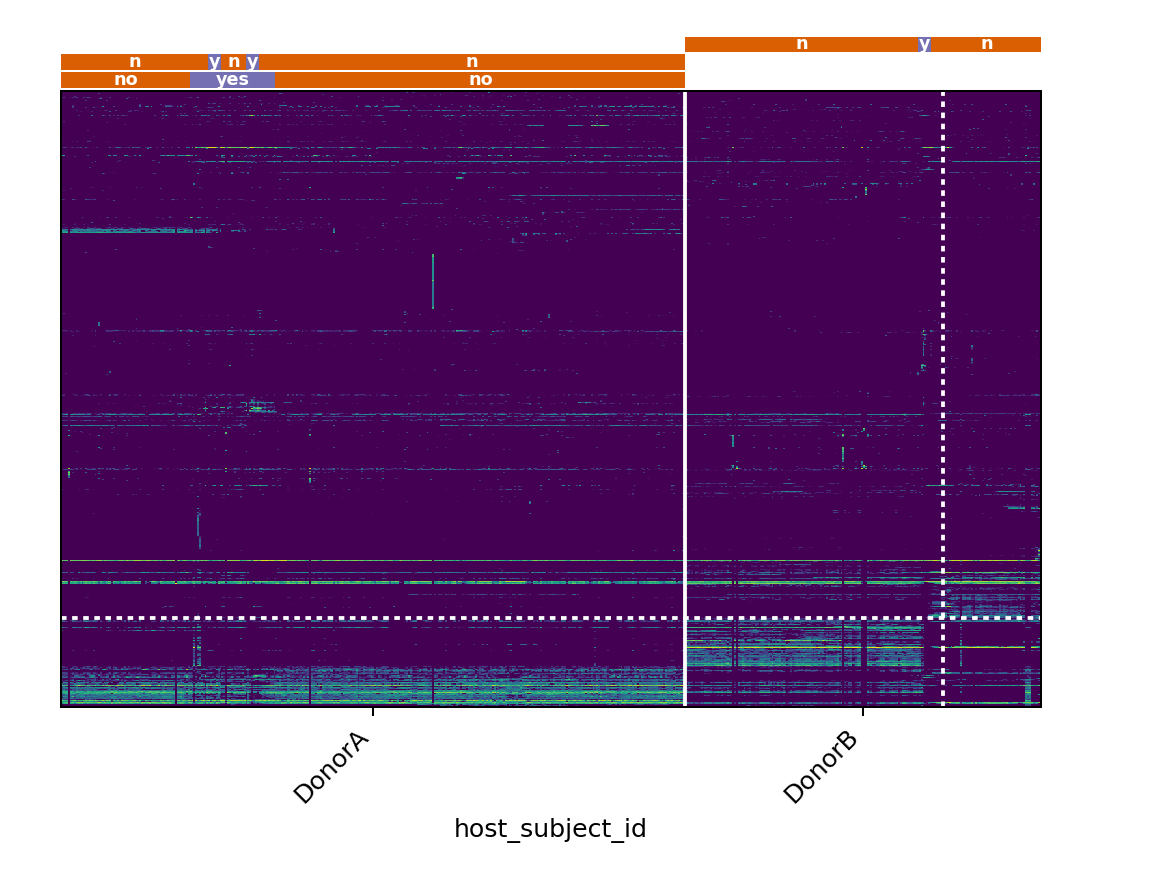

In [35]:
alm_feces.plot(sample_field='host_subject_id', gui='jupyter',sample_color_bars=['travel','diarrhea_donor_A', 'diarrhea_donor_B']);

By exploring the heatmap, we found that two sOTUs with sequences
__`TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGATAGGTCAGTCTGTCTTAAAAGTTCGGGGCTTAACCCCGTGATGG`__ and __`TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG`__ are increased in both of the donors during the diarrhea and then are decreased after diarrhea. We can look at the taxonomy of these 2 sOTUs:

In [36]:
alm_feces.feature_metadata.loc['TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGATAGGTCAGTCTGTCTTAAAAGTTCGGGGCTTAACCCCGTGATGG', 'taxonomy']

['k__Bacteria',
 'p__Firmicutes',
 'c__Clostridia',
 'o__Clostridiales',
 'f__Veillonellaceae',
 'g__Veillonella',
 's__dispar']

In [37]:
alm_feces.feature_metadata.loc['TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG', 'taxonomy']

['k__Bacteria',
 'p__Proteobacteria',
 'c__Gammaproteobacteria',
 'o__Enterobacteriales',
 'f__Enterobacteriaceae',
 'g__Serratia',
 's__marcescens']

__And we can reproduce the view we found by setting the `rect` parameter. In this view, you can see the dynamic of one of the two sOTUs:__

<IPython.core.display.Javascript object>


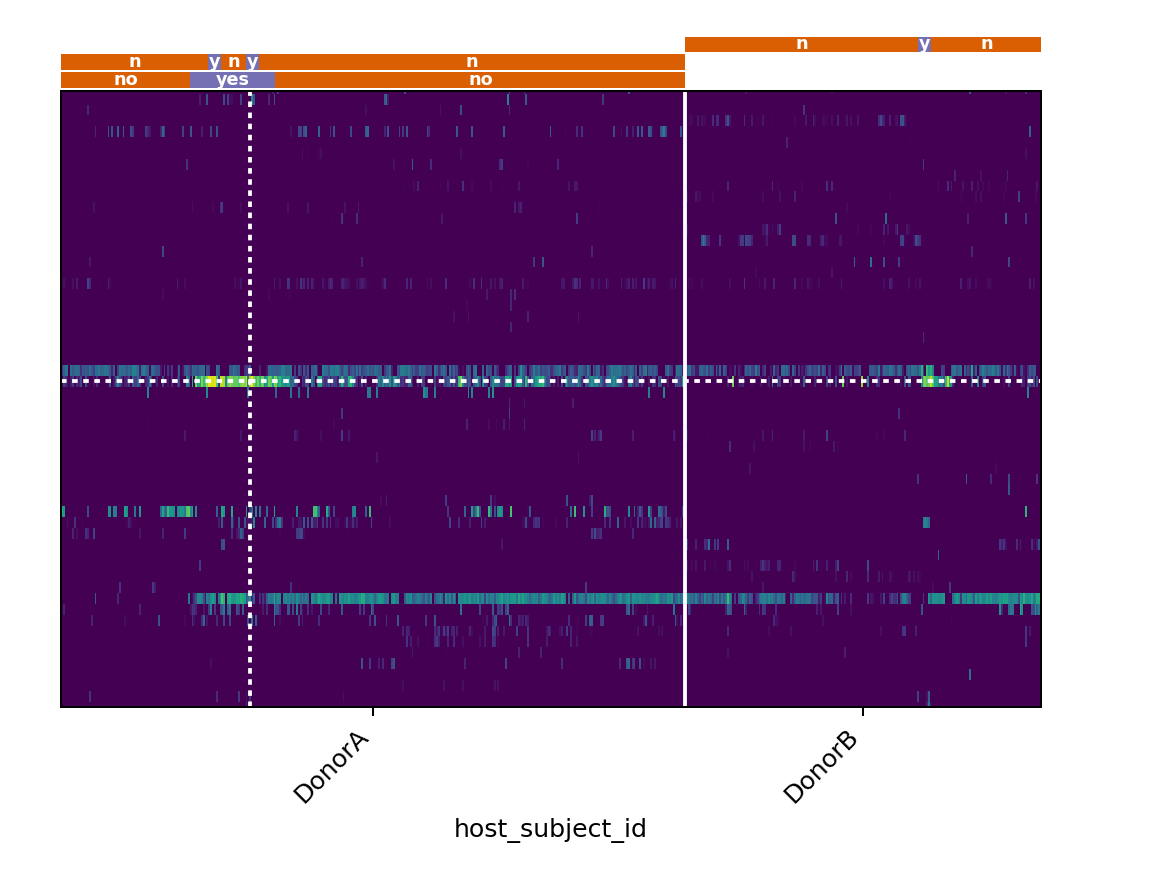

In [38]:
alm_feces.plot(sample_field='host_subject_id', gui='jupyter',sample_color_bars=['travel','diarrhea_donor_A', 'diarrhea_donor_B'], rect=[None, None, 113.0, 56.25]);

## Let's also look at the saliva samples

In [39]:
alm_saliva.sort_centroid(inplace=True, n=2)

Experiment alm.biom with 285 samples, 7289 features

<IPython.core.display.Javascript object>


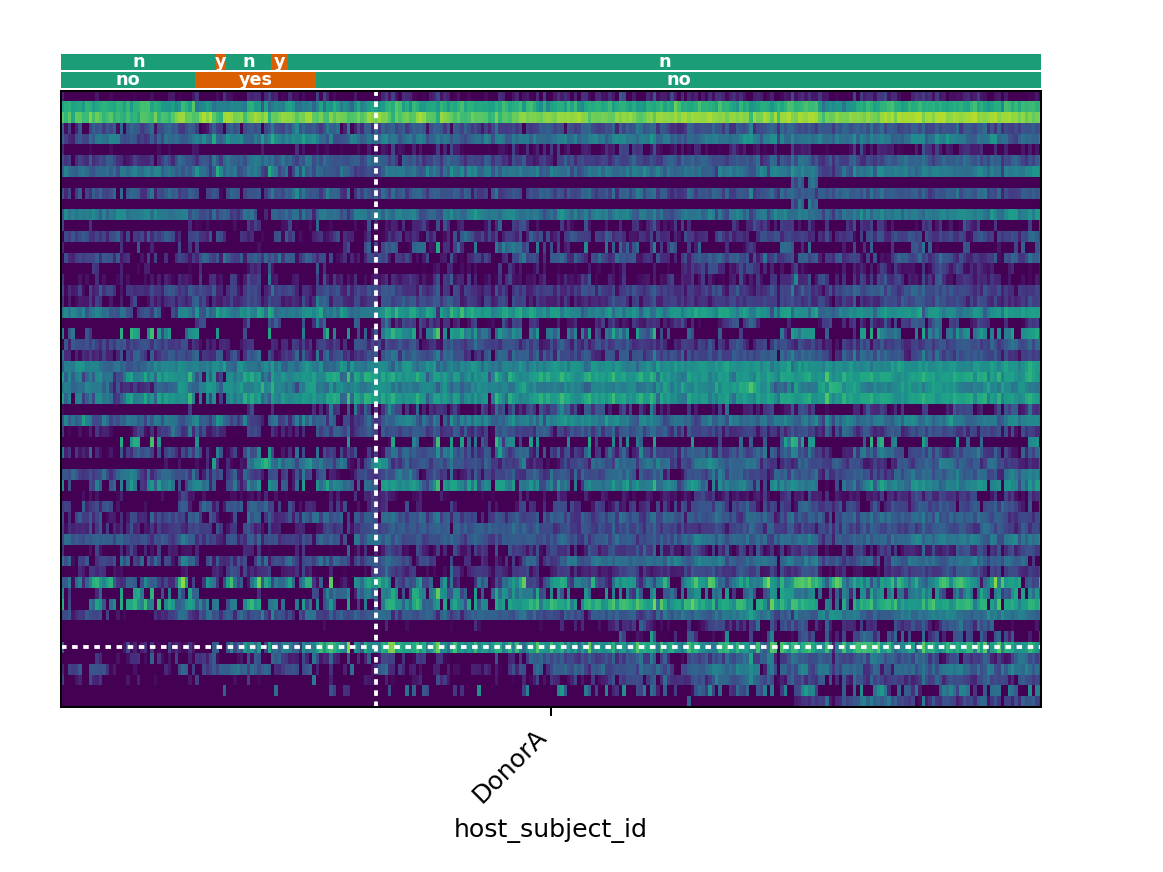

In [40]:
alm_saliva.plot(sample_field='host_subject_id', gui='jupyter',sample_color_bars=['travel','diarrhea_donor_A', 'diarrhea_donor_B']);

We can see one sOTU (with sequence `TACGGAGGGTGCAAGCGTTATCCGGACTTATTGGGTTTAAAGGGTCCGTAGGCGGGTTATTAAGTCAGTGGTGAAATCTCATAGCTCAACTATGAAACTG`) starts to appear during the travel and persists even after travel. The taxonomy of this sOTU is:

In [41]:
alm_saliva.feature_metadata.loc['TACGGAGGGTGCAAGCGTTATCCGGACTTATTGGGTTTAAAGGGTCCGTAGGCGGGTTATTAAGTCAGTGGTGAAATCTCATAGCTCAACTATGAAACTG', 'taxonomy']

['k__Bacteria',
 'p__Bacteroidetes',
 'c__Flavobacteriia',
 'o__Flavobacteriales',
 'f__[Weeksellaceae]',
 'g__',
 's__']

## Conclusions
* As reported in the original paper, we can see the dramatic shift in gut microbiota after Salmonella infection.
* In addition, we see other interesting behavior (saliva sOTU picked from travel, gut sOTUs increased in diarrhea in both hosts), which is difficult to identify without capabilitie to explore the data interactively.